## <code style="color:steelblue">Student Name: Zheyuan Dong</code>

#### COMPANION WORKBOOK

# Model Evaluation

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

#### Important Note: You're now in the driver's seat!

For this project, we're going to leave the standard model training steps to you. But don't worry, we've provided a **guided exercise** for each of the major steps. It's imperative that you finish those exercises, and you can find them below.

## I. Prep Work

#### First, let's import the libraries, helper functions, and classes we'll need.
* Again, we'll have you import the right libraries for this module. We've included comments below to guide you.
* If you forget one, you can always add it here later and re-run this code block.
* When in doubt regarding which Scikit-Learn submodule something belongs to, this <a href="http://scikit-learn.org/stable/modules/classes.html" target="_blank">documentation page</a> is a great resource.
* Check the answer key if needed.

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns 
sns.set_style('white')




#### Next, let's read in the analytical base table you saved at the end of Module 2.

In [2]:
# Load analytical base table from Module 2
abt = pd.read_csv('analytical_base_table.csv')
abt.shape

(14068, 26)

In [9]:
# Create the noisy conditional again 

# Feature
x = np.linspace(0, 1, 1000)
X = x.reshape(-1, 1)

# Noise
np.random.seed(555)
epsilon= np.random.uniform(-0.02, 0.02, 1000)

# Target 
y = ((x + epsilon) > 0.97).astype(int) 

In [10]:
print(y.mean())

0.029


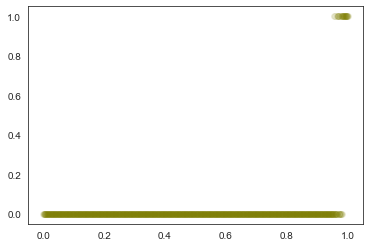

In [12]:
plt.scatter(x, y, color='olive', alpha=0.1)
plt.show()

## II. Accuracy vs. Imbalanced Classes

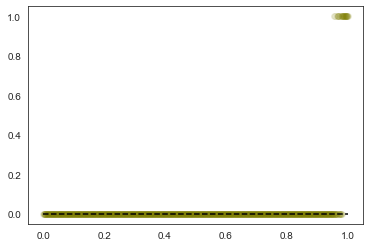

In [13]:
# Create a brain-dead predictor that always predict 0 
pred_dumb = [0] * len(y)

plt.scatter(x, y, color='olive', alpha=0.1)
plt.plot(x, pred_dumb, 'k--')
plt.show()

In [18]:
# Compared to L2 Logistic Regression, C= 10 
from sklearn.linear_model import LogisticRegression 

clf= LogisticRegression(C= 10, random_state= 123)
clf.fit(X, y)

LogisticRegression(C=10, random_state=123)

In [19]:
# predicted classes
pred_class = clf.predict(X)

# predicted probabilities 
pred = clf.predict_proba(X)
pred = [p[1] for p in pred]

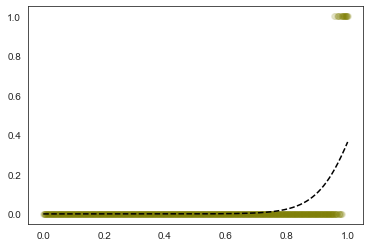

In [20]:
plt.scatter(x, y, color='olive', alpha=0.1)
plt.plot(x, pred, 'k--')
plt.show()

The Logistic regression looks better as it assigns large confidence (probability) to high x value, but if we calculate accuracy score it has the same performance as the dumb-0 algorithm

In [21]:
from sklearn.metrics import accuracy_score 
print ('dumb-0:  ', accuracy_score(y, pred_dumb))
print ('logistic:  ', accuracy_score(y, pred_class))

dumb-0:   0.971
logistic:   0.971


## III. True Positive Rate vs. False Positive Rate

In [22]:
from sklearn.metrics import confusion_matrix 

In [23]:
print( confusion_matrix(y, pred_class) )

[[971   0]
 [ 29   0]]


917 TRUE negatives, 29 FALSE negatives

In [24]:
# Check TPR and FPR for the logistic regression model
cm = confusion_matrix(y, pred_class)

tp= cm[1][1]
fp= cm[0][1]
tn= cm[0][0]
fn= cm[1][0]

print('TPR= {}'.format(tp/(tp+fn))) 
print('FPR= {}'.format(fp/(fp+tn))) 

TPR= 0.0
FPR= 0.0


In [26]:
# Check if predicted probabilities are under 0.5 even for large x values
print(np.round(pred[-10:],2))
print(pred_class[-10:])

[0.33 0.34 0.34 0.34 0.35 0.35 0.35 0.36 0.36 0.36]
[0 0 0 0 0 0 0 0 0 0]


In [30]:
# We can change the cutoff probability threshold to increase performance in this case
pred_class_v2= (np.array(pred)> 0.25).astype(int)  # Need to turn the pred from a list to an array 
pred_class_v2[-10:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
cm2= confusion_matrix(y, pred_class_v2)
cm2

array([[962,   9],
       [  3,  26]], dtype=int64)

In [34]:
tp= cm2[1][1]
fp= cm2[0][1]
tn= cm2[0][0]
fn= cm2[1][0]

print('TPR= {}'.format(tp/(tp+fn))) 
print('FPR= {}'.format(fp/(fp+tn))) 

TPR= 0.896551724137931
FPR= 0.009268795056642637


## IV. Area Under ROC Curve (AUROC)

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve 

In [39]:
# ROC curve is plotting FPR against TPR across all thresholds
fpr, tpr, thresholds= roc_curve(y, pred)

pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Thresholds': thresholds
})

,FPR,TPR,Thresholds
0,0.000,0.000,1.364
1,0.000,0.034,0.364
2,0.000,0.586,0.308
3,0.001,0.586,0.305
4,0.001,0.724,0.292
5,0.003,0.724,0.285
6,0.003,0.759,0.282
7,0.007,0.759,0.269
8,0.007,0.793,0.266
9,0.008,0.793,0.263


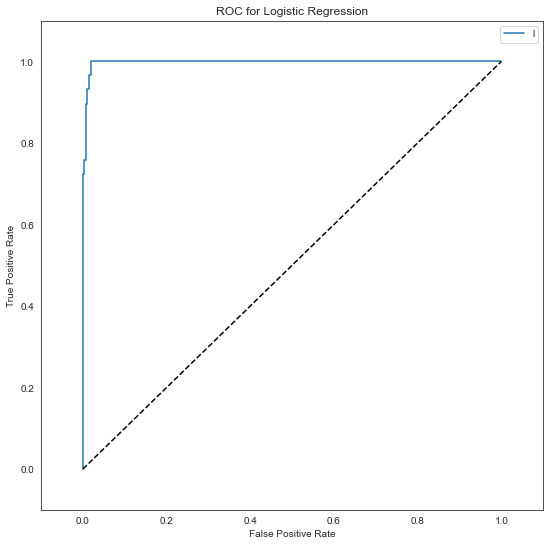

In [42]:
# Plot the ROC curve

fit= plt.figure(figsize=(9,9))
plt.title('ROC for Logistic Regression')

plt.plot(fpr, tpr, label= 'l1')
plt.legend('lower right')

plt.plot([0,1], [0,1], 'k--')  # This is from 0 to 1 for both x and y axis

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
# Calculate the AUROC, note that we use the predicted probability instead of predicted class here

roc_auc_score(y, pred)

0.9971589900209524

The AUROC will be 0.5 for the dumb classifier. Because for any given observation it assigns the same class regardless. Mathemetically, the FPR always equal to TPR, as they are always 0
<br>Note that this has nothing to do with the balence of class itself

In [46]:
roc_auc_score(y, pred_dumb)

0.5

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 4.1 - Split Your Dataset</span>

Let's start by splitting our data into separate training and test sets. Remember, your data is a **limited resource**.
* You can spend some of it to train your model.
* You can spend some of it to test, or evaluate your model.
* But you can't use the same data for both!

Having a true "unseen" test dataset helps you detect overfit models and ultimately select the best model.

#### A.) First, separate the dataframe into separate objects for the target variable, <code style="color:steelblue">y</code>, and the input features, <code style="color:steelblue">X</code>.

In [53]:
# Split sample 
from sklearn.model_selection import train_test_split

# Pipeline and cross validation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score 

In [51]:
X= abt.drop('status', axis= 1)
y= abt.status

Now you can pass <code style="color:steelblue">X</code> and <code style="color:steelblue">y</code> to the <code style="color:steelblue">train_test_split()</code> function. If you forgot to import this function, you can go back and import it. When in doubt, this <a href="http://scikit-learn.org/stable/modules/classes.html" target="_blank">documentation page</a> is a great resource. Simply search (Windows Control + F or Mac Command + F) for the function you want. The prefix before the function name is where it's located. For example:

<pre style="color:steelblue">
    from sklearn<strong>.model_selection</strong> import <strong>train_test_split</strong>
</pre>

#### B.) After you've imported the function, split <code style="color:steelblue">X</code> and <code style="color:steelblue">y</code> into training and test sets.
* Pass in the argument <code style="color:steelblue">test_size=<span style="color:crimson">0.2</span></code> to set aside 20% of our observations for the test set.
* Pass in <code style="color:steelblue">random_state=<span style="color:crimson">1234</span></code> to set the random state for replicable results.
* **Important:** Also pass in the argument <code style="color:steelblue">stratify=<span style="color:crimson">abt.status</span></code> in order to make sure the target variable's classes are balanced in each subset of data! This is **stratified random sampling**.
* Then, print the number of observations in each subset to check that it was done correctly.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234, stratify= abt.status)

print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

11254 2814 11254 2814


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
11254 2814 11254 2814
</pre>

## <span style="color:RoyalBlue">Exercise 4.2 - Build Model Pipelines</span>

Next, let's set up preprocessing pipelines for each of our algorithms. Remember, it's almost always useful to **standardize** our features, or bring them to the same scale.

#### A.) First, make sure you've imported 2 important tools for this step.
* <code style="color:steelblue">make_pipeline()</code> for building the pipeline.
* <code style="color:steelblue">StandardScaler()</code> for standardization.
* Again, this <a href="http://scikit-learn.org/stable/modules/classes.html" target="_blank">documentation page</a> is a great resource.

#### B.) Next, create a single <span style="color:royalblue">pipeline dictionary</span> with pipelines for each algorithm.
* Use the keys:
    * <code style="color:crimson">'l1'</code> for $L_1$-regularized logistic regression
    * <code style="color:crimson">'l2'</code> for $L_2$-regularized logistic regression
    * <code style="color:crimson">'rf'</code> for random forest
    * <code style="color:crimson">'gb'</code> for gradient boosted tree.
* Each pipeline should standardize the data first.
* Remember to set <code style="color:steelblue">random_state=<span style="color:crimson">123</span></code> for each algorithm to ensure replicable results.

In [63]:
pipelines= {}

pipelines['l1'] = make_pipeline(StandardScaler(), LogisticRegression(penalty= 'l1', solver= 'liblinear', random_state= 123)) 
pipelines['l2'] = make_pipeline(StandardScaler(), LogisticRegression(random_state= 123))
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestClassifier(random_state= 123))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state= 123))

pipelines

{'l1': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(penalty='l1', random_state=123,
                                     solver='liblinear'))]),
 'l2': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=123))]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=123))]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=123))])}

Now that we have our pipelines, we're ready to move on to declaring hyperparameters to tune.

## <span style="color:RoyalBlue">Exercise 4.3 - Declare Hyperparameter Grids</span>

Remember, there are two types of parameters we need to worry about when using machine learning algorithms. 
* Model parameters
* Hyperparamters

The key distinction is that model parameters can be learned directly from the training data while hyperparameters cannot (so they must be **tuned**)!

#### A.) First, list the tunable hyperparameters of your $L_1$-regularized logistic regression pipeline.

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}
</pre>

All of the keys that begin with <code style="color:crimson">'logisticregression__'</code> are hyperparameters. Fortunately, you don't need to tune all of them. For **regularized logistic regression**, the most impactful hyperparameter is the **strength of the penalty**. 

Remember, for Lasso, Ridge, and Elastic-Net, this was <code style="color:steelblue;">alpha</code>. But for Logistic regrssion, it's actually <code style="color:steelblue; font-weight:bold">C</code>.
* <code style="color:steelblue;">C</code> is the **inverse** of regularization strength!
* That means higher values of <code style="color:steelblue;">C</code> mean weaker penalties.
* <code style="color:steelblue">C</code> is a positive value, typically between 0 and 1000.
* The default is 1.0.
* We recommend trying values between 0.001 and 1000 to start with.

#### B.) Declare the hyperparameter grids for     <code style="color:crimson">l1</code> ($L_1$-regularized logistic regression) and <code style="color:crimson">l2</code> ($L_2$-regularized logistic regression).
* Try the following values for <code>C</code>: <code>[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]</code>
* Remember to include the correct **prefix**!

In [65]:
hypers= {}

hypers['l1'] = {'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
hypers['l2'] = {'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

#### C.) Next, declare the hyperparameter grid for your  random forest.
* For **random forests**, the first hyperparameter to tune is <code style="color:steelblue; font-weight:bold">n_estimators</code>. Let's try <code style="color:crimson">100</code> and <code style="color:crimson">200</code>.

* The second one we'll tune is <code style="color:steelblue; font-weight:bold">max_features</code>. We'll try <code style="color:crimson">'auto'</code>, <code style="color:crimson">'sqrt'</code>, and <code style="color:crimson">0.33</code>.

* The third one we'll tune is <code style="color:steelblue; font-weight:bold">min_samples_leaf</code>. Let's try <code>[1, 3, 5, 10]</code>.

* Remember to include the correct **prefix**!

In [69]:
hypers['rf'] = {
    'randomforestclassifier__n_estimators': [100, 200], 
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33], 
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

#### D.) Next, declare the hyperparameter grid for the boosted tree.
* For **boosted trees**, we'll tune <code style="color:steelblue; font-weight:bold">n_estimators</code> as well. We'll try <code style="color:crimson">100</code> and <code style="color:crimson">200</code>.

* The second one we'll tune is <code style="color:steelblue; font-weight:bold">learning_rate</code>. We'll try <code style="color:crimson">0.05</code>, <code style="color:crimson">0.1</code>, and <code style="color:crimson">0.2</code>.

* Finally, we'll tune <code style="color:steelblue; font-weight:bold">max_depth</code>. We'll try <code style="color:crimson">1</code>, <code style="color:crimson">3</code>, and <code style="color:crimson">5</code>.

In [67]:
hypers['gb'] = {
    'gradientboostingclassifier__n_estimators': [100, 200], 
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2], 
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

## <span style="color:RoyalBlue">Exercise 4.4 - Fit and Tune Models with Cross-Validation</span>

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with **cross-validation**.

#### A.) First, make sure you've imported the helper for cross-validation, <code style="color:steelblue">GridSearchCV</code>.
* Again, this <a href="http://scikit-learn.org/stable/modules/classes.html" target="_blank">documentation page</a> is a great resource.

#### B.) Next, create a <code style="color:SteelBlue">fitted_models</code> dictionary that includes models that have been tuned using cross-validation.
* The keys should be the same as those in the <code style="color:SteelBlue">pipelines</code> and <code style="color:SteelBlue">hyperparameters</code> dictionaries. 
* The values should be <code style="color:steelblue">GridSearchCV</code> objects that have been fitted to <code style="color:steelblue">X_train</code> and <code style="color:steelblue">y_train</code>.
* After fitting each model, print <code style="color:crimson">'{name} has been fitted.'</code> just to track the progress.
* (Optionally) You can set <code style="color:steelblue">n_jobs=<span style="color:crimson">-1</span></code> to use as many cores as available on your computer.

This step can take a few minutes, so please be patient. After kicking off your model training loop, feel free to get up, walk around, grab a beverage, etc.

In [70]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypers[name], n_jobs= 1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print (name, 'is fitted')    

l1 is fitted
l2 is fitted
rf is fitted
gb is fitted


## <span style="color:RoyalBlue">Exercise 4.5 - AUROC Review</span>

Finally, it's time to evaluate our models and pick the best one. Just as in the previous project, we'll first evaluate the models by looking at their **cross-validated performance** on the training set.

#### A.) First, display the <code style="color:steelblue">best\_score_</code> attribute for each fitted model.
* If you get different numbers, check to see that you've set the <code style="color:steelblue">random_state=</code> correctly for each of the models.


In [71]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.8477877091662964
l2 0.8477877091662964
rf 0.9786744459252679
gb 0.9750311861394934


Those scores are **holdout accuracy** scores. For classification problems, the default scoring metric is accuracy.
* Accuracy is simply the percent of observations correctly classified by the model.
* Because it's the average accuracy from the **holdout folds**, higher is almost always better.

However, as you'll remember from the Coding Section, straight accuracy is not always the best way to evaluate a classification model. 

#### B.) Get the predicted classes from your $L_1$-regularized logistic regression and display the first 10. 
* Remember to use <code style="color:steelblue">.predict()</code> instead of <code style="color:steelblue">.predict_proba()</code> to get the predicted classes directly.

In [77]:
model = fitted_models['l1']
model.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

#### C.) Next, display the confusion matrix for the set of predictions from part (B). Answer the following questions.
* How many observations were correctly classified?
* How many true positives were there?
* How many true negatives were there?
* How many false positives were there?
* How many false negatives were there?

In [78]:
yhats= model.predict(X_test)
confusion_matrix(y_test, yhats)

array([[1969,  172],
       [ 220,  453]], dtype=int64)

#### D.) Next, get the predicted positive class probabilities from your $L_1$-regularized logistic regression and display the first 10.
* Note, for clarity, we rounded to 2 decimals.

In [80]:
yhats_prob = model.predict_proba(X_test)
yhats_prob = [np.round(p[1],2) for p in yhats_prob]
yhats_prob[:10]

[0.03, 0.0, 0.01, 0.09, 0.07, 0.48, 0.13, 0.62, 0.73, 0.14]

#### E.) Next, calculate the ROC curve for your $L_1$-regularized logistic regression using the <code style="color:steelblue">roc_curve()</code> function that we imported earlier.

In [81]:
roc_l1 = roc_curve(y_test, yhats)

#### F.) Plot the entire ROC curve for your $L_1$-regularized logistic regression.

Text(0, 0.5, 'TPR')

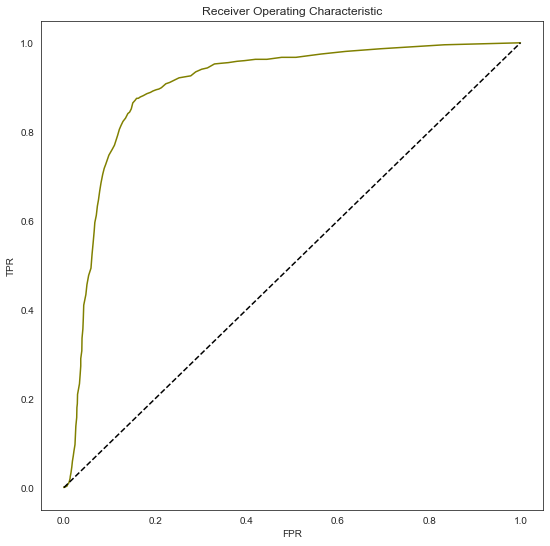

In [89]:
fpr, tpr, cutoffs = roc_curve(y_test, yhats_prob)  # Note that we need to use probability instead of actual predicted class

plt.figure(figsize=(9,9))

plt.plot(fpr, tpr, color= 'olive')
plt.plot([0,1], [0,1], 'k--')

plt.title('Receiver Operating Characteristic')
plt.xlabel('FPR')
plt.ylabel('TPR')

#### G.) Finally, answer this question: What is the probability that a randomly chosen <code style="color:crimson">'Left'</code> observation ranks higher (has a higher predicted probability) than a randomly chosen <code style="color:crimson">'Employed'</code> observation?

In [92]:
roc_auc_score(y_test, yhats_prob)

0.9013774791049717

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
0.9015388373737675
</pre>

## <span style="color:RoyalBlue">Exercise 4.6 - Pick the Winner</span>

Now that we've taken a detour to dive into some of the intuition behind AUROC, let's calculate it for each of our fitted models on the test set.

#### A.) Using a <code style="color:SteelBlue">for</code> loop, print the AUROC performance of each model in <code style="color:SteelBlue">fitted_models</code> on the test set.
* Label the output with the name of the algorithm. For example:

<pre style="color:crimson">
rf 0.9915201892159932
</pre>

* Which model had the highest test AUROC?
* Did it also have the highest cross-validated score?

In [95]:
for name, model in fitted_models.items():
    yhat_probs = model.predict_proba(X_test)
    yhat_probs=[p[1] for p in yhat_probs]
    print(name, roc_auc_score(y_test, yhat_probs))

l1 0.9015430014581236
l2 0.9015381433597084
rf 0.9921097541593997
gb 0.988616434391728


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
l1 0.9015388373737675
l2 0.9015367553315894
rf 0.9915201892159932
gb 0.9886802836851869
</pre>

Let's save the winning model. Make sure you've already imported the <code style="color:steelblue">pickle</code> package.

#### B.) Finally, save the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.
* Just save the <code style="color:steelblue">Pipeline</code>, not the <code style="color:steelblue">GridSearchCV</code> object.
* **Hint:** Remember the <code style="color:steelblue">.best\_estimator_</code> attribute?

In [ ]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

Congratulations for making through this model training and evaluation module! As a reminder, here are a few things you did in this module:
* You split your dataset into training and test sets.
* You set up model pipelines and hyperparameter grids.
* You tuned your models using cross-validation.
* You learned about how AUROC is a more effective metric for classification than simple accuracy.
* And finally, you saved the winning model.

In the next module, we'll see how you can go the extra mile in terms of project delivery. That includes preparing to apply your model to raw data and packaging it up into an executable script.